In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
# pd.set_option('display.max_columns', None)

In [2]:
dataset = pd.read_csv('train.csv')
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
dataset.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
dataset['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

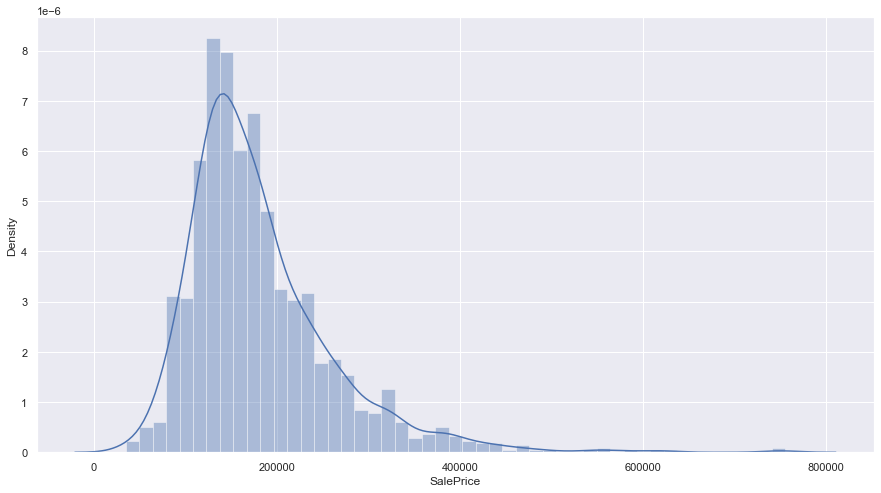

In [6]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.distplot(dataset['SalePrice'] )

## As we can se that the house price about 15000$ is the most common

In [7]:
data_with_na = [i for i in dataset.columns if dataset[i].isnull().sum()>1]

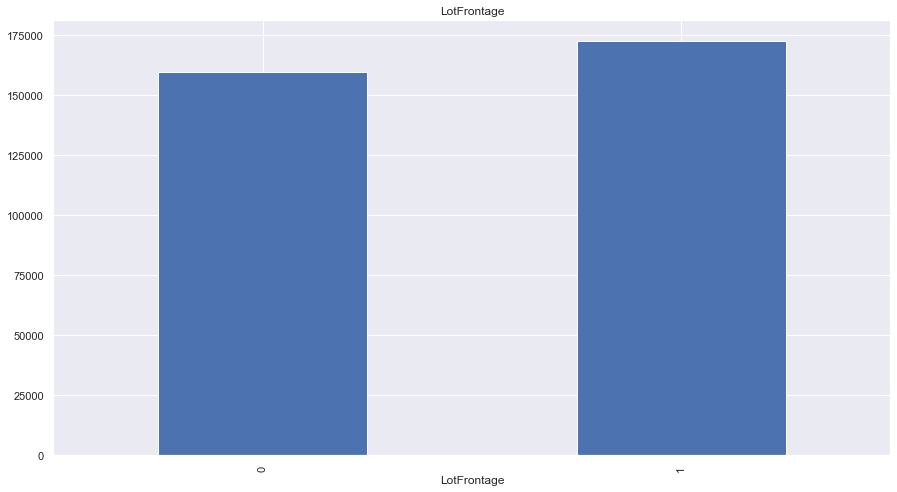

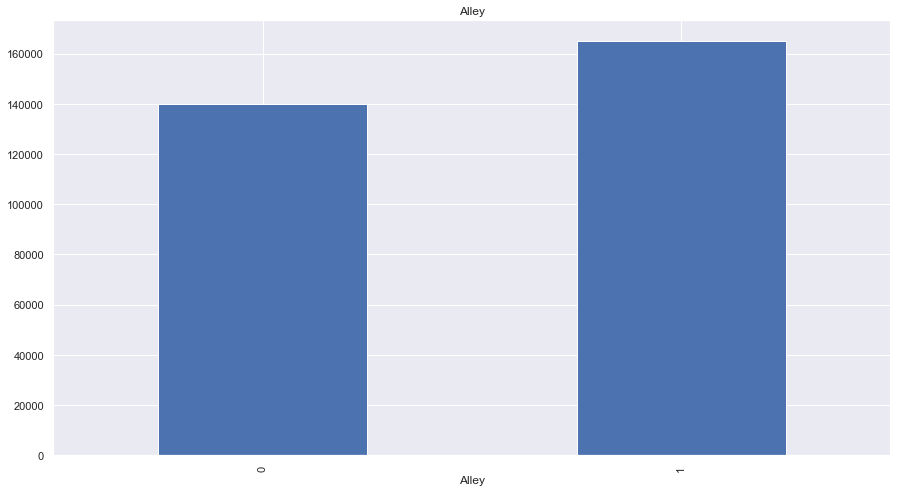

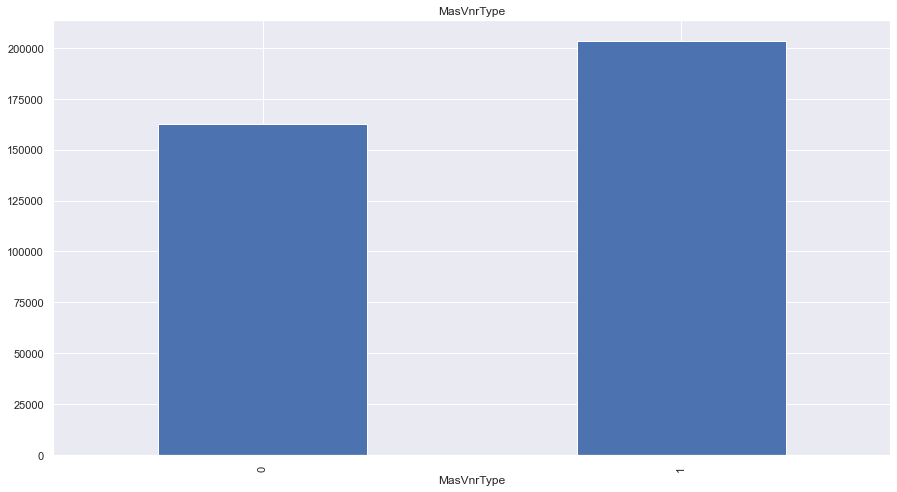

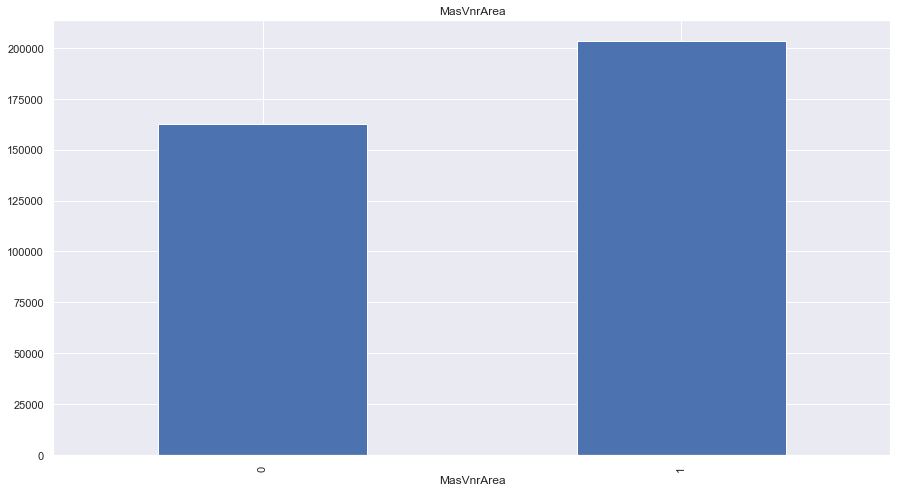

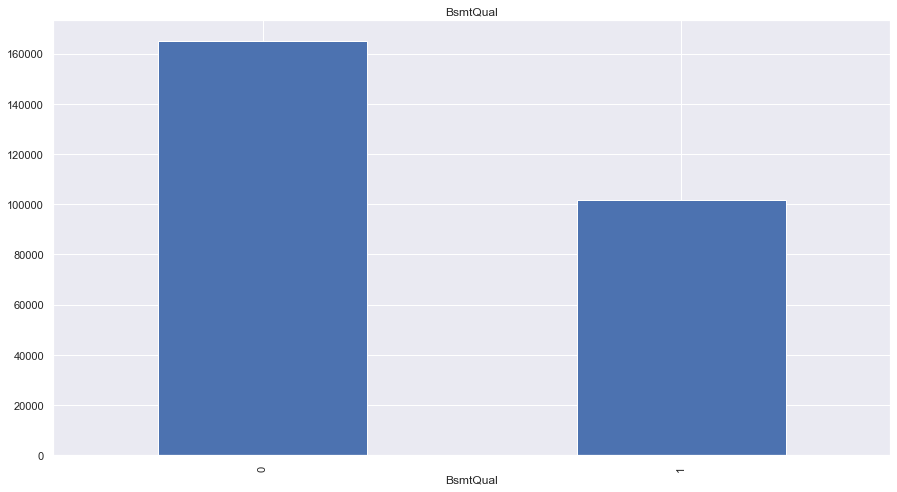

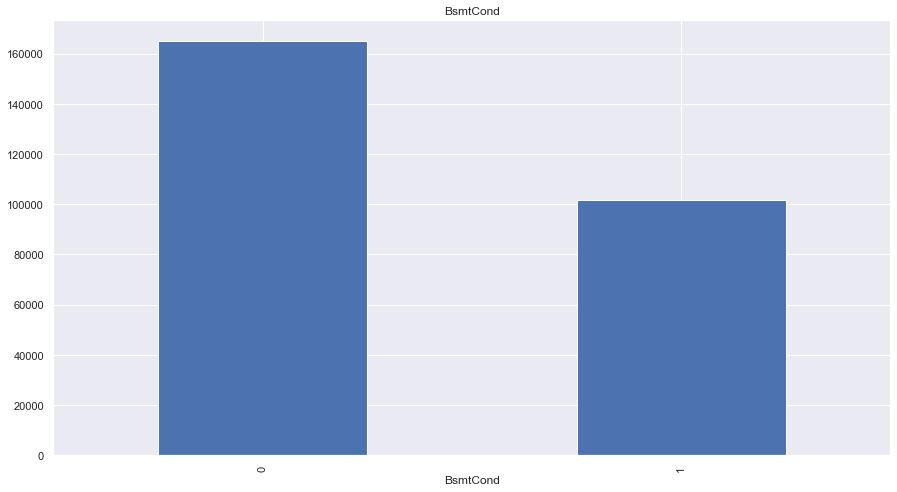

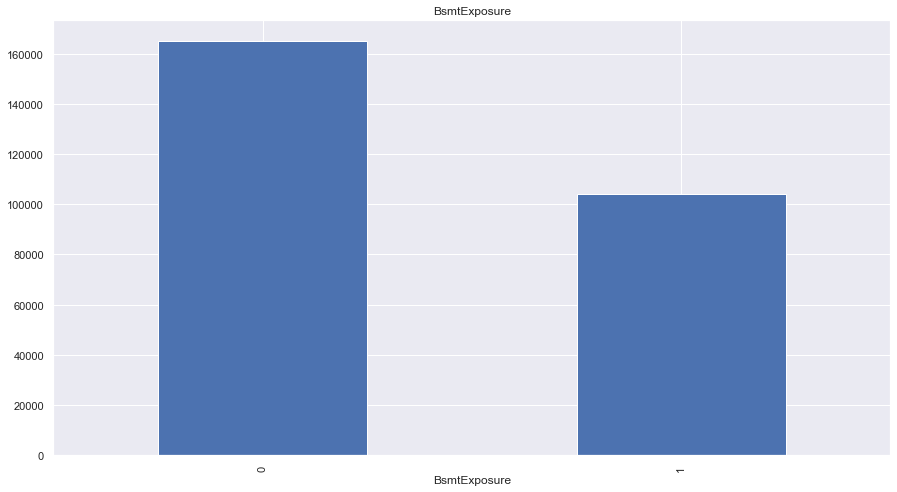

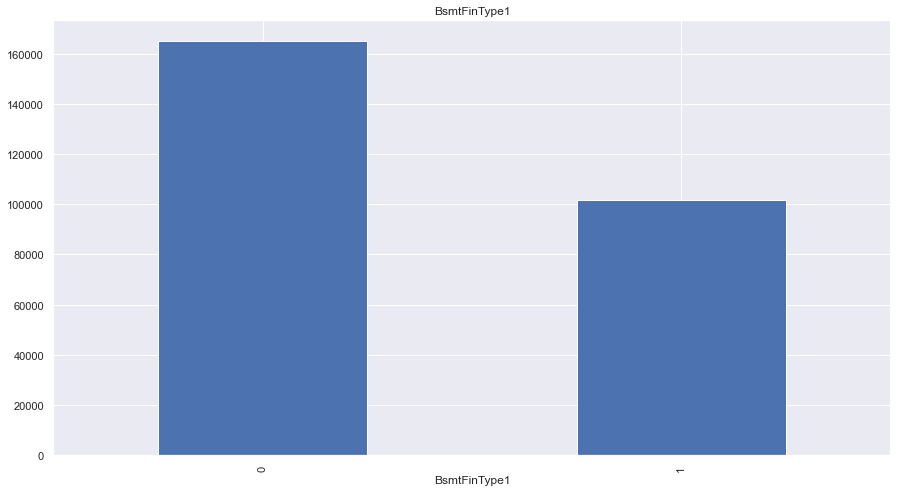

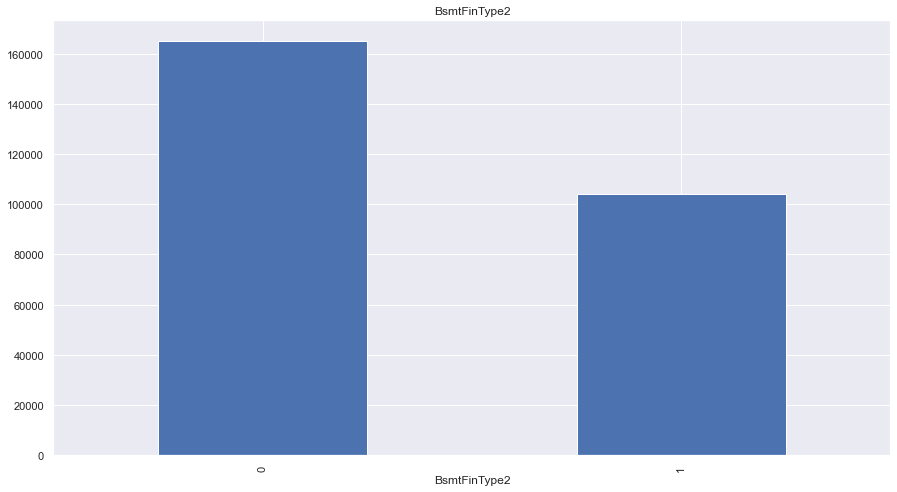

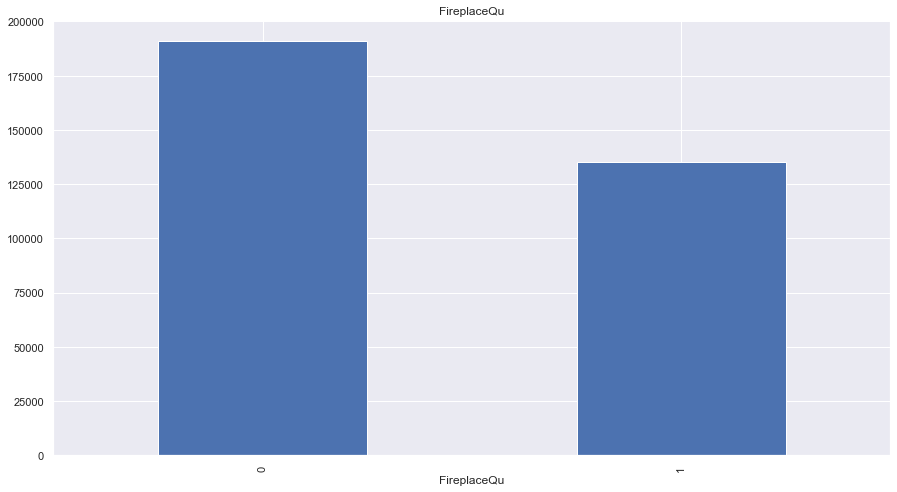

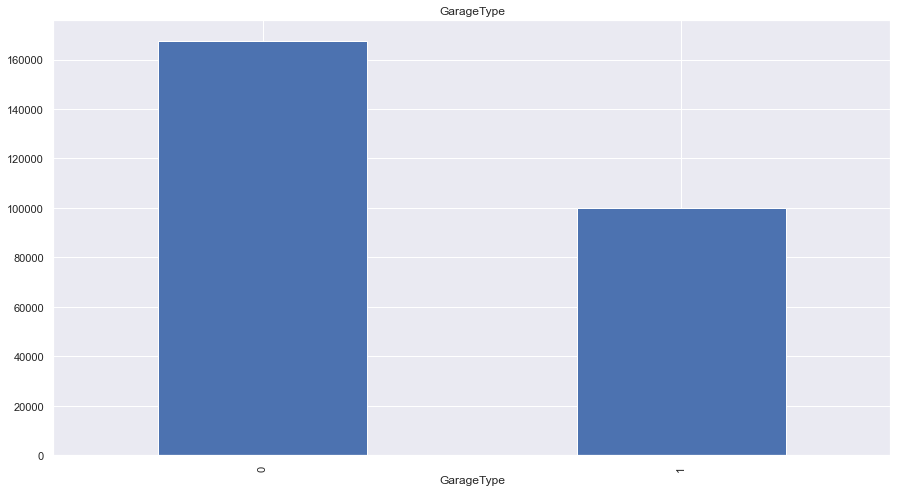

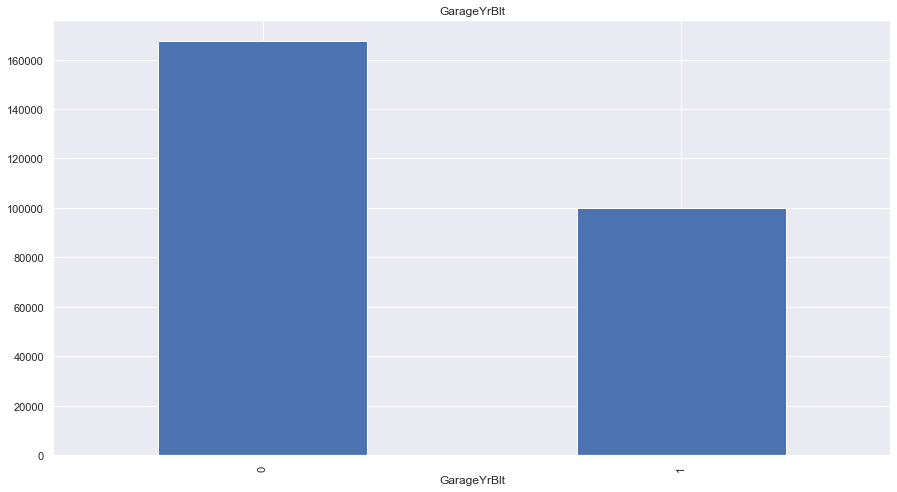

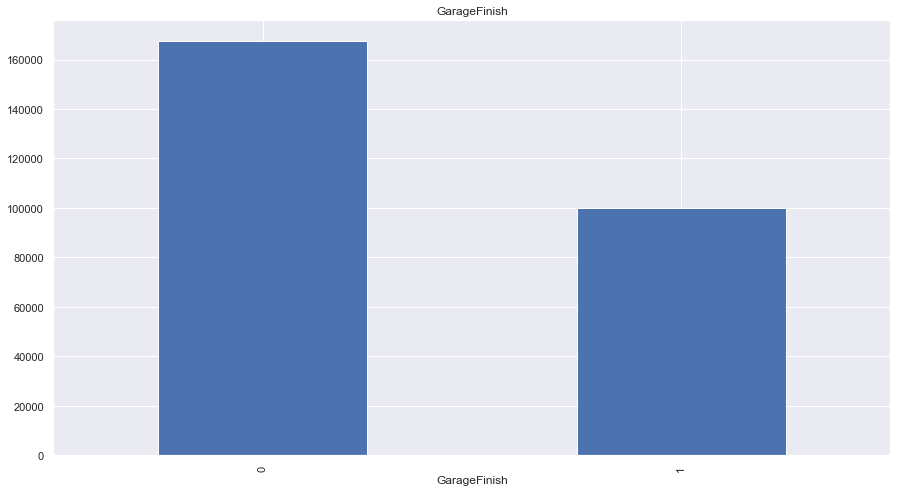

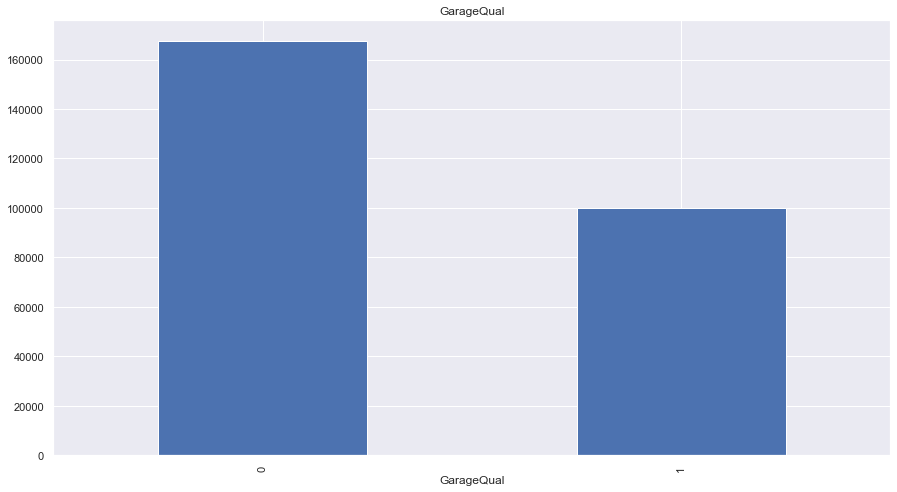

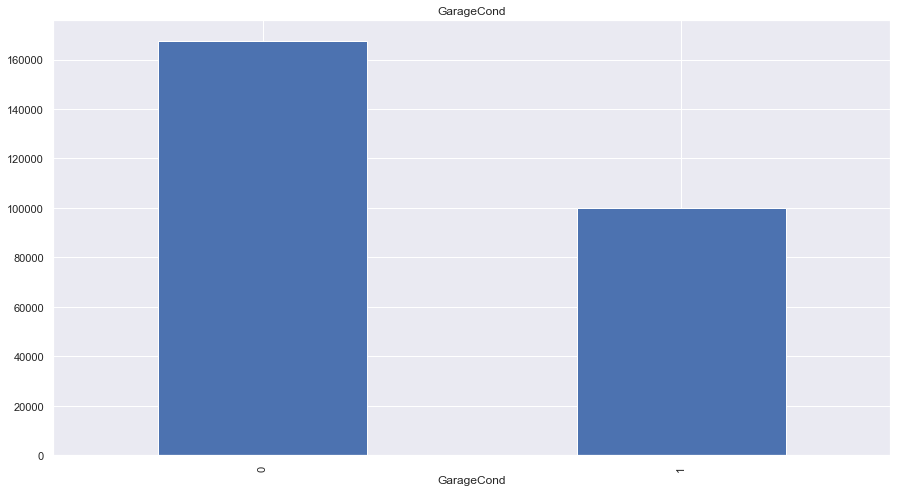

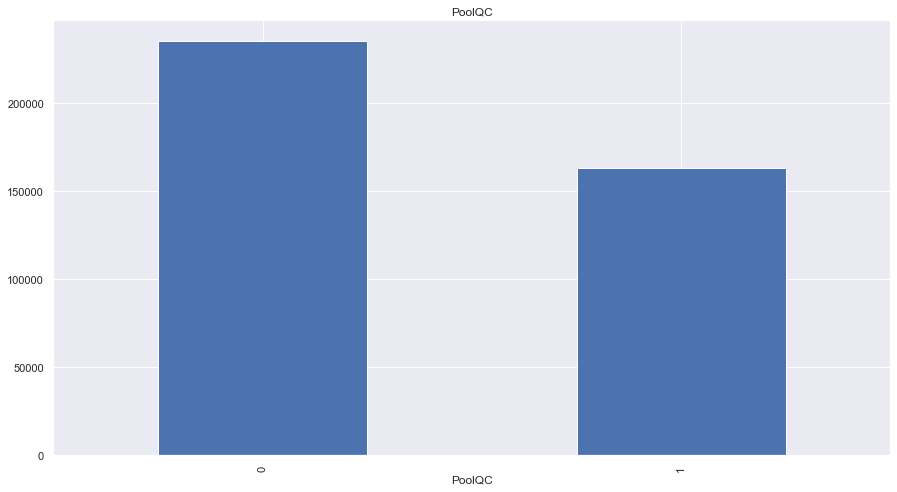

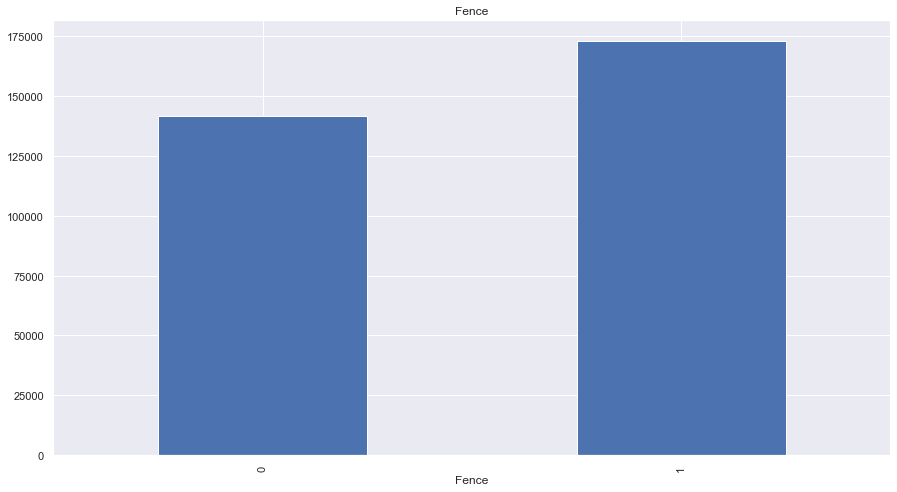

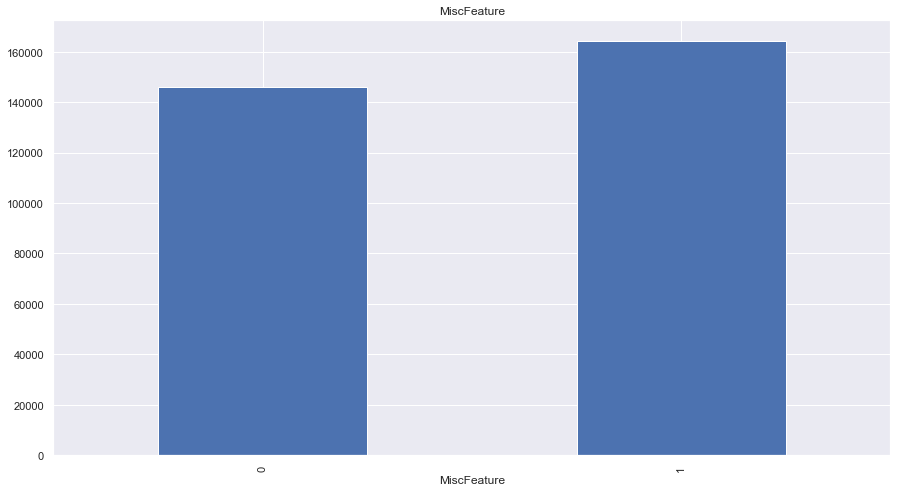

In [8]:
for na in data_with_na:
    data1 = dataset.copy()
    data1[na] = np.where(dataset[na].isnull(),1,0)
    data1.groupby(na)['SalePrice'].median().plot.bar()
    plt.title(na)
    plt.show()

In [9]:
numberical = [i for i in dataset.columns if dataset[i].dtypes != 'O']
dataset[numberical].head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

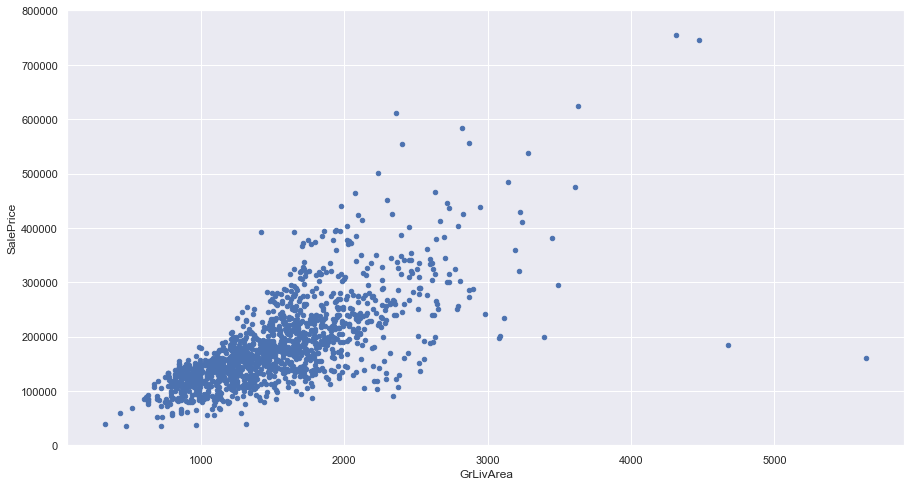

In [11]:
df_sale_area = pd.concat([dataset['SalePrice'], dataset['GrLivArea']], axis =1)
df_sale_area.plot.scatter(x = 'GrLivArea', y = 'SalePrice', ylim = (0,800000))

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='TotalBsmtSF', ylabel='SalePrice'>

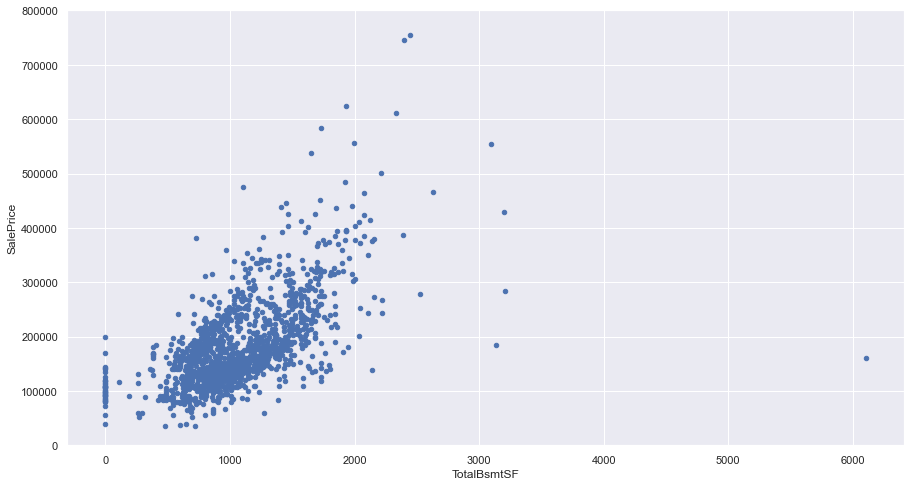

In [12]:
df_sale_area = pd.concat([dataset['SalePrice'], dataset['TotalBsmtSF']], axis =1)
df_sale_area.plot.scatter(x = 'TotalBsmtSF', y = 'SalePrice', ylim = (0,800000))

(-0.5, 9.5, 0.0, 800000.0)

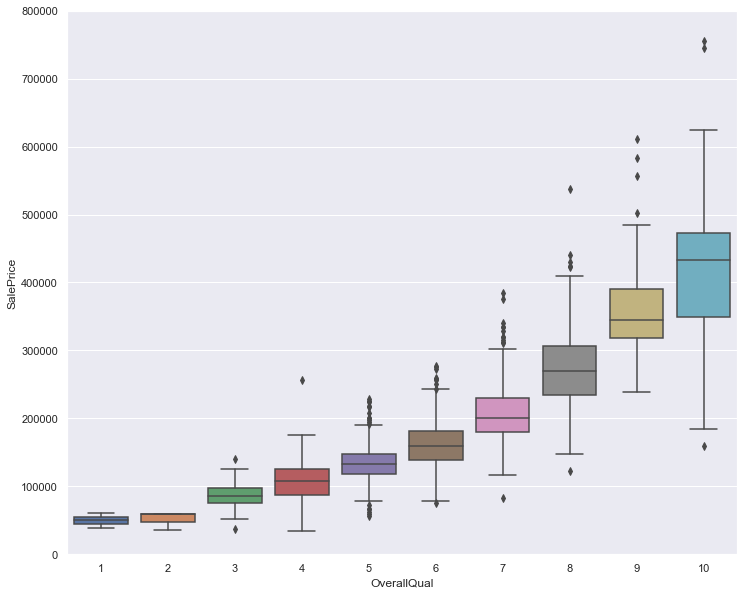

In [13]:
df2 = pd.concat([dataset['SalePrice'], dataset['OverallQual']], axis =1)
f, ax = plt.subplots(figsize = (12,10))
fig =sns.boxplot(x = 'OverallQual', y = 'SalePrice', data = dataset)
fig.axis(ymin = 0, ymax =800000)

In [14]:
year = [i for i in numberical if 'Yr' in i or 'Year' in i]
year

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

Text(0.5, 1.0, 'House Price vs YearSold')

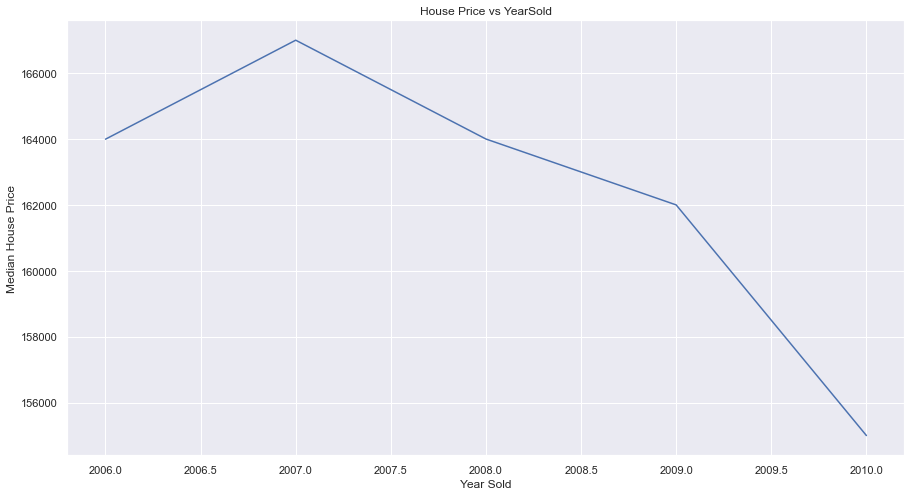

In [15]:
dataset.groupby('YrSold')['SalePrice'].median().plot()
plt.xlabel('Year Sold')
plt.ylabel('Median House Price')
plt.title("House Price vs YearSold")

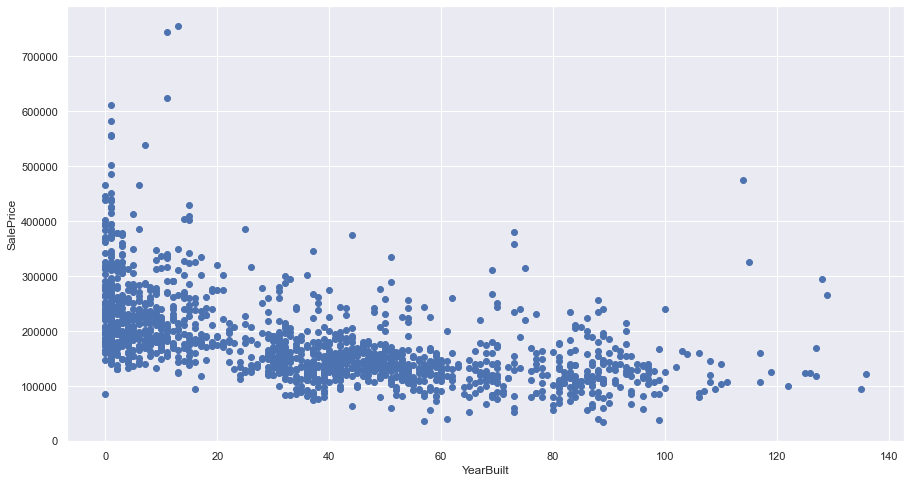

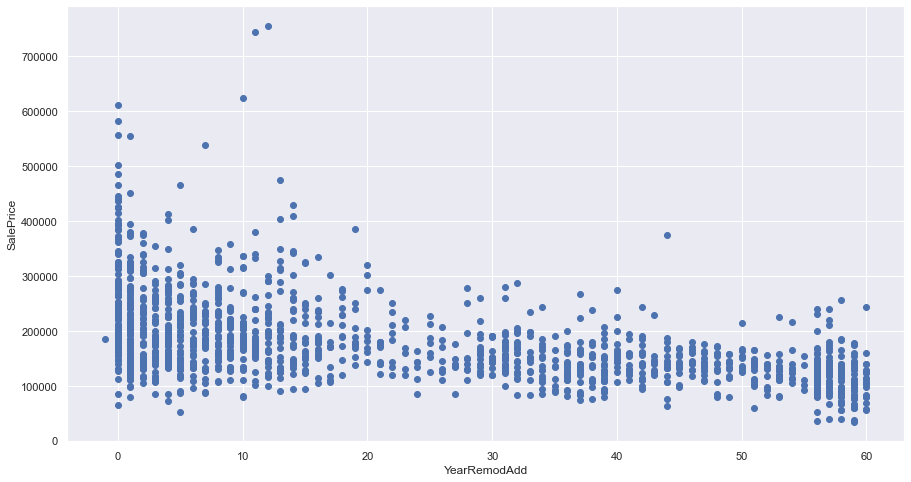

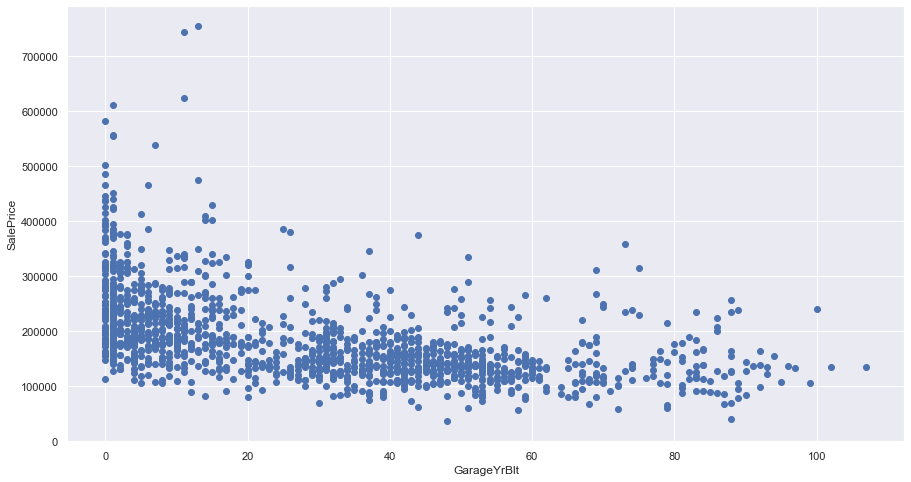

In [16]:
for i in year:
    if i!='YrSold':
        data=dataset.copy()
        data[i]=data['YrSold']-data[i]
        plt.scatter(data[i],data['SalePrice'])
        plt.xlabel(i)
        plt.ylabel('SalePrice')
        plt.show()
    

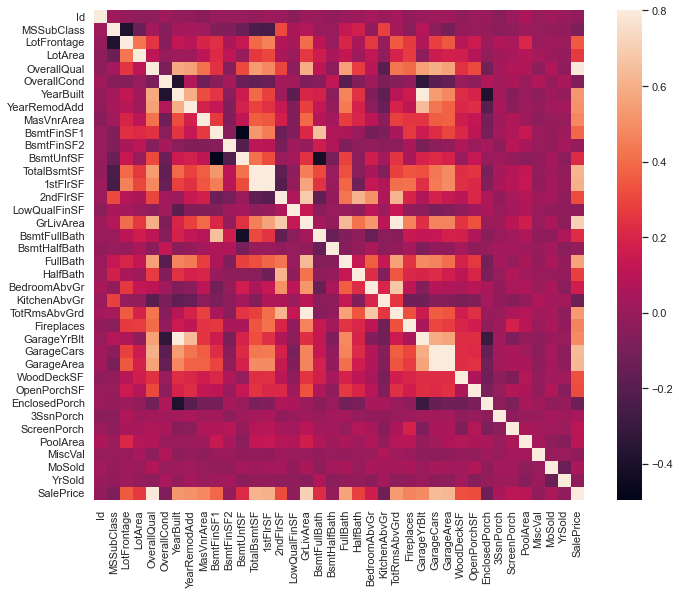

In [17]:
corr= dataset.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corr, vmax=.8, square=True);

<AxesSubplot:>

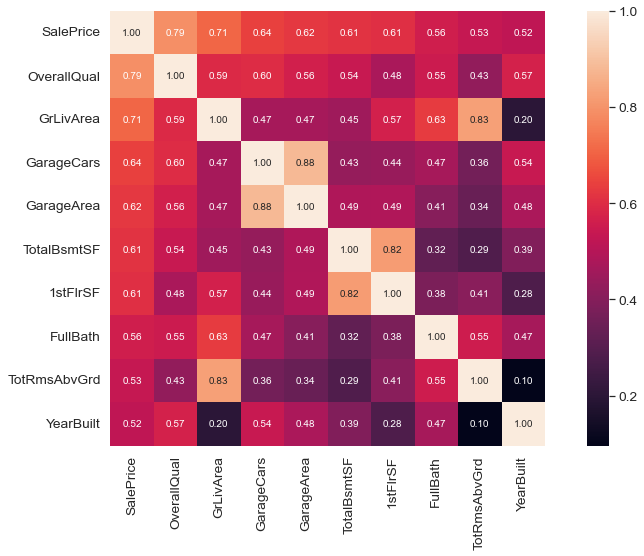

In [18]:
k = 10
cols = corr.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(dataset[cols].values.T)
sns.set(font_scale = 1.25)
sns.heatmap(cm, cbar = True, annot =True, square =True, fmt ='.2f', annot_kws = {'size':10}, yticklabels=cols.values, xticklabels = cols.values)

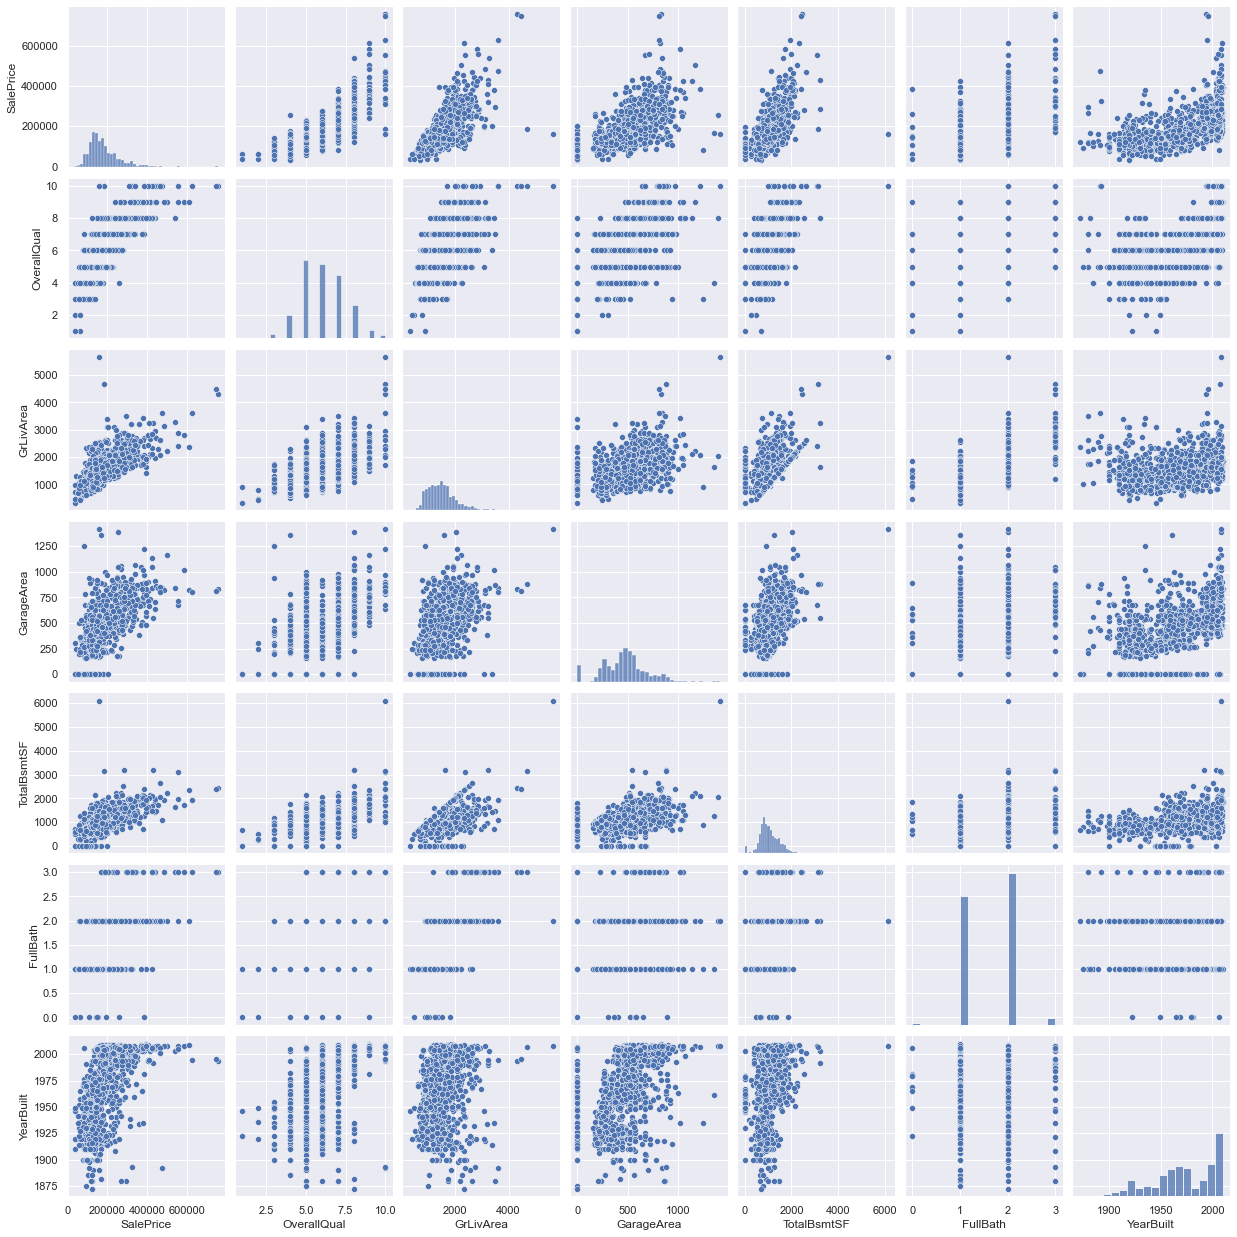

In [19]:
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageArea', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(dataset[cols], size =2.5)
plt.show()

## Missing Data

In [20]:
df = dataset.copy()
total_na = df.isnull().sum().sort_values(ascending = False)
percent_na = (df.isnull().sum()/df.isnull().count()).sort_values(ascending = False)
missing = pd.concat([total_na, percent_na], axis =1, keys = ['total', 'percent'])
missing.head(20)

,total,percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
GarageCond,81,0.055479
GarageType,81,0.055479
GarageFinish,81,0.055479


In [21]:
df1 = df.drop((missing[missing['total'] > 1]).index, 1)

In [22]:
df1 = df1.drop((df1[df1['Electrical'].isnull()].index))

In [23]:
df1.isnull().sum().max()

0

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

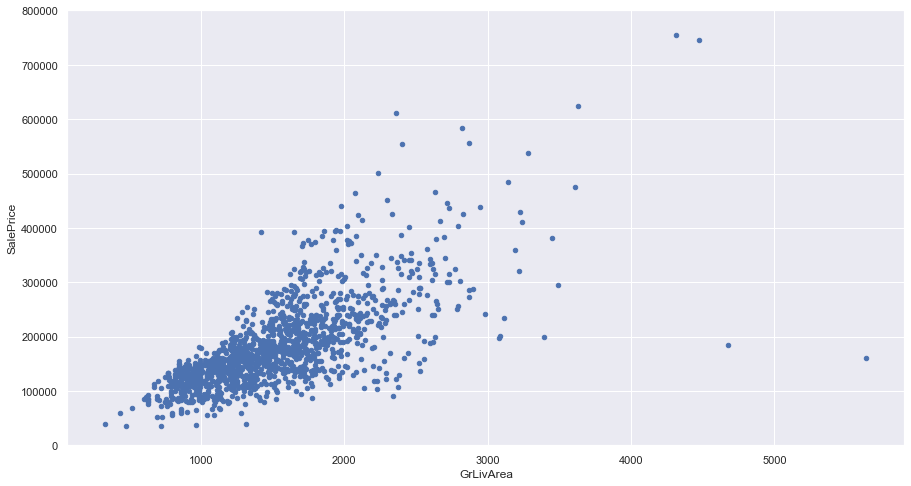

In [24]:
data = pd.concat([df1['SalePrice'], df1['GrLivArea']], axis =1, )
data.plot.scatter(x = 'GrLivArea', y = 'SalePrice', ylim =(0,800000))

In [25]:
dataset.sort_values(by = 'GrLivArea', ascending = False)[0:2]
dataset = dataset.drop(dataset[dataset['Id'] == 1299].index)
dataset = dataset.drop(dataset[dataset['Id'] == 523].index)
dataset.sort_values(by = 'GrLivArea', ascending = False)[0:2]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
523,524,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750
1182,1183,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,...,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='TotalBsmtSF', ylabel='SalePrice'>

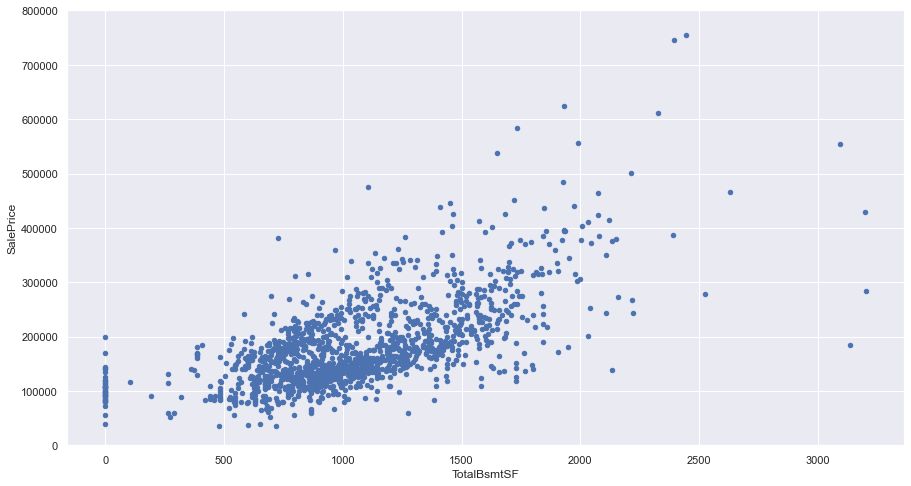

In [26]:
data = pd.concat([dataset['SalePrice'], dataset['TotalBsmtSF']], axis = 1)
data.plot.scatter(x = 'TotalBsmtSF', y = 'SalePrice', ylim =(0, 800000))

In [27]:
dataset['SalePrice'] = np.log(dataset['SalePrice'])

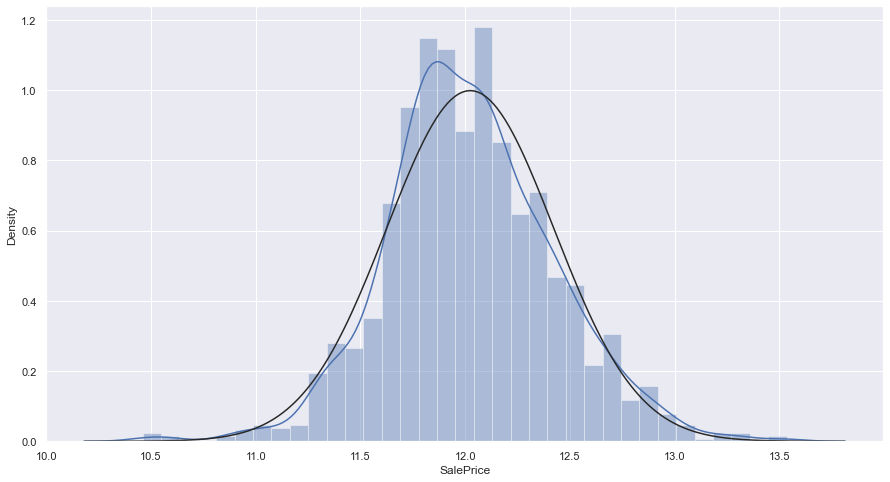

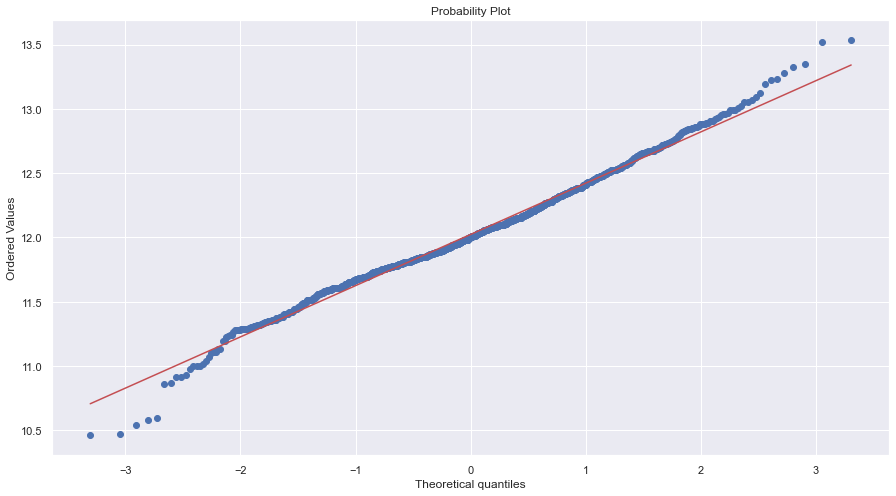

In [28]:
sns.distplot(dataset['SalePrice'], fit = norm);
fig = plt.figure()
res = stats.probplot(dataset['SalePrice'], plot=plt)